**Tensorflow Example  #01**

This Notebook Explains a simple introduction to tensorflow a deep learning framework by Google

** What is TensorFlow?**

TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

**MNIST DATASET**

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

**What are we going to implement?** 

We are going to make a simple linear model to classify the hand writen images
This is based on [Hvass Laboratories](https://www.youtube.com/watch?v=wuo4JdG3SvU&t=767s) 
Tutorial which helped me lot to understand tensorflow

**Imports**

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

**Understanding the Data**

Here we are going to plot one of our images to know how it is packed 

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
(55000, 784)


Text(0.5,0,'Label : 8 ')

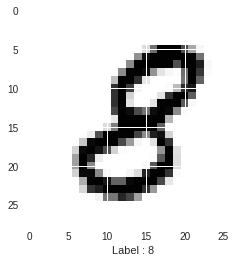

In [96]:
data=input_data.read_data_sets('data/MNIST/',one_hot=True)
print(data.train.images.shape)
img=data.train.images[5:6,:]
img=img.reshape([28,28])
plt.imshow(img)
plt.xlabel("Label : {} ".format(np.argmax(data.train.labels[5:6,:],1)[-1]))



**Values which defines our Network**


Later these values are used for Creating our learning variables (Weight and bias)



In [0]:
img_size=28
input_size=784
img_shape=(28,28)
num_classes=10

In [0]:
x=tf.placeholder(tf.float32, [None,input_size])
y=tf.placeholder(tf.float32, [None,num_classes])
y_true_cls=tf.placeholder(tf.int64, [None])

In [0]:
weight = tf.Variable(tf.zeros([input_size,num_classes]))
bias = tf.Variable(tf.zeros(([num_classes])))

**Model**

This littile eqaution represents a part of our model this eqaution is used to make our predictions in our forward pass . Then we perform a softmax and argmax functions because we need the class value(0-9) so first we apply softmax to make it  [0,1] range then we take the index of largest value as our prediction

More information about [softmax](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d) and [argmax](https://www.tensorflow.org/api_docs/python/tf/argmax)


In [0]:
logists=tf.matmul(x, weight) + bias

In [87]:
y_pred = tf.nn.softmax(logists)
print(y_pred.shape)
y_pred_cls = tf.argmax(y_pred,axis=1)
print(y_pred_cls)

(?, 10)
Tensor("ArgMax_6:0", shape=(?,), dtype=int64)


**Loss Function**

We choose this inbuild loss function for our model and to minimize this we use gradient descent
This is called back propagation where our model adjust it's parameters and learn from the given examples

[Gradient Deccent](https://towardsdatascience.com/gradient-descent-simply-explained-1d2baa65c75)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logists, labels=y)

In [0]:
cost = tf.reduce_mean(cross_entropy)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [0]:
correct_class = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_class, tf.float32))

**Training**

In tensorflow execution starts by creating a session and we have to input the vlaue for placeholders
to run the specified operation if your operation doesn't require any external inputs the **feed_dict** will be empty otherwise you have to specify each placeholder and their values

In [0]:
session=tf.Session()
session.run(tf.global_variables_initializer())

In [0]:
def train( epochs ):
  for i in range(epochs):
    x_train,y_train = data.train.next_batch(batch_size = 100)
    feed_dict_train = {x:x_train, y:y_train}
    session.run(optimizer, feed_dict = feed_dict_train)

In [94]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])
print(data.test.cls.shape)
print(data.test.labels.shape)
feed_dict_test={x:data.test.images,
               y:data.test.labels,
               y_true_cls:data.test.cls
               }

def accuracy_score():
  value=session.run(accuracy,feed_dict = feed_dict_test)
  print("Acurracy on test set {0:.1%} ".format(value))

(10000,)
(10000, 10)


In [95]:
train(1000)
accuracy_score()

Acurracy on test set 92.4% 
